## 야후 파이낸스로 주식 정보 가져오기

In [1]:
!pip install yfinance

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

C:\Users\jaeyeon\anaconda3\envs\fin\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,48903.105469,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,48024.605469,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,48659.078125,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,48219.828125,10365440


Adj Close을 쓰지 않고 Close를 쓴다. (Adj Close의 잘못된 정보)

In [4]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-11-30,214.100006,214.759995,210.839996,214.070007,214.070007
2020-12-01,214.509995,217.320007,213.350006,216.210007,216.210007
2020-12-02,214.880005,215.470001,212.800003,215.369995,215.369995
2020-12-03,214.610001,216.380005,213.649994,214.240005,214.240005
2020-12-04,214.220001,215.380005,213.179993,214.360001,214.360001


In [5]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-30', '2020-12-01', '2020-12-02',
               '2020-12-03', '2020-12-04'],
              dtype='datetime64[ns]', name='Date', length=635, freq=None)

In [6]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

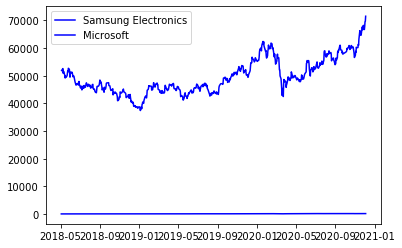

In [7]:
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'b', label='Microsoft')
plt.legend(loc='best')
plt.show()


## 일간 변동률로 주가 비교하기

일간 변동률 = { (오늘의 종가 - 어제의 종가) / (어제의 종가) } * 100

In [8]:
type(sec['Close'])

pandas.core.series.Series

In [9]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-11-30    66700.0
2020-12-01    67800.0
2020-12-02    69500.0
2020-12-03    69700.0
2020-12-04    71500.0
Name: Close, Length: 635, dtype: float64

In [10]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-11-30    68200.0
2020-12-01    66700.0
2020-12-02    67800.0
2020-12-03    69500.0
2020-12-04    69700.0
Name: Close, Length: 635, dtype: float64

shift 사용해 데이터를 이동시키고 오늘의 종가와 어제의 종가를 비교한다.

In [11]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [12]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

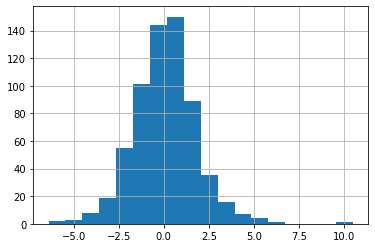

In [13]:
import matplotlib.pylab as plt
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [14]:
sec_dpc.describe()

count    635.000000
mean       0.065746
std        1.752780
min       -6.387665
25%       -0.994476
50%        0.106610
75%        1.040849
max       10.470588
Name: Close, dtype: float64

In [15]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-11-30    34.721998
2020-12-01    36.371173
2020-12-02    38.878548
2020-12-03    39.166317
2020-12-04    41.748814
Name: Close, Length: 635, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


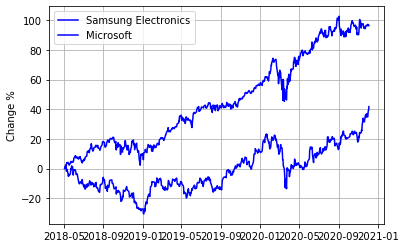

In [16]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100

sec_dpc.iloc[0] = 0
msft_dpc.iloc[0] = 0

sec_dpc_cs = sec_dpc.cumsum()
msft_dpc_cs = msft_dpc.cumsum()

import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'b', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()